In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#link is :https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c01_dogs_vs_cats_without_augmentation.ipynb
import tensorflow as tf


In [3]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [5]:

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)
     

68606236/68606236 [==============================] - 0s 0us/step


In [7]:

zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [8]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our v

In [9]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
print (total_train)
print(total_val)
     

2000
1000


In [10]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [11]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and

In [12]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data
     

In [13]:

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')
     

Found 1000 images belonging to 2 classes.


In [15]:

sample_training_images, _ = next(train_data_gen) 

In [16]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

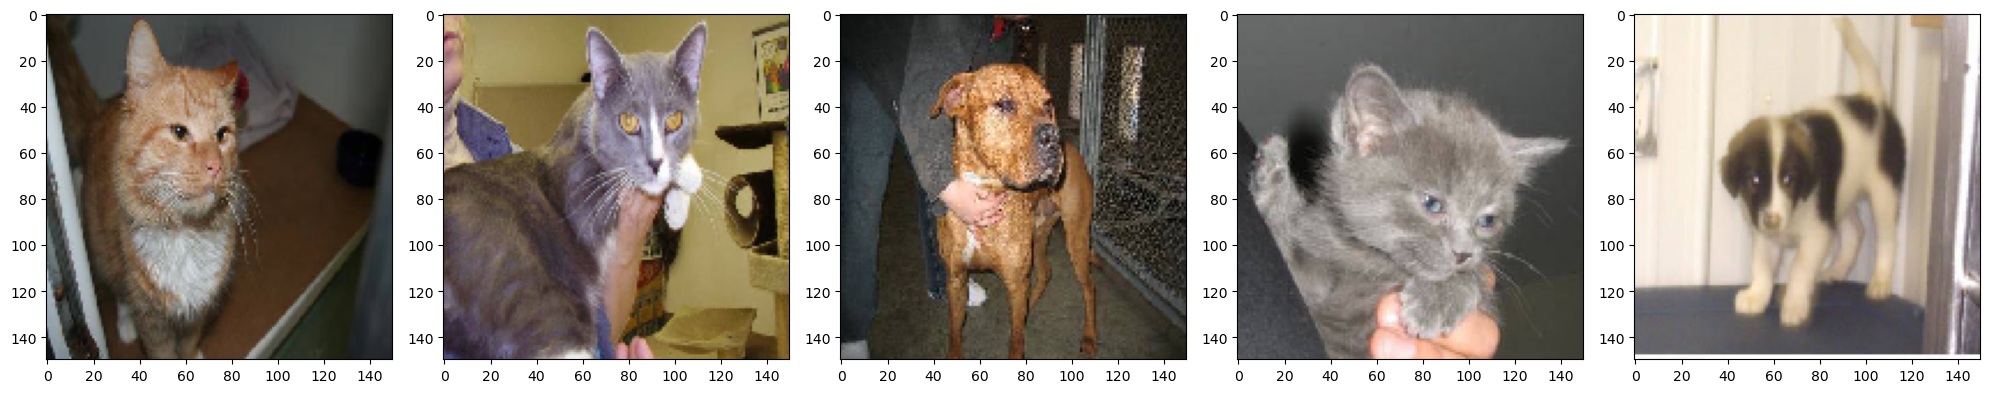

In [17]:
plotImages(sample_training_images[:5])  # Plot images 0-4
     

In [18]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

"""
Here's a breakdown of the layers:

tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)): This is the first convolutional layer, which applies 32 filters of size 3x3 to the input image. The activation function used is ReLU, which helps introduce non-linearity into the model. The input shape of the images is (150, 150, 3), meaning that the images have a height and width of 150 pixels and 3 color channels (red, green, and blue).

tf.keras.layers.MaxPooling2D(2, 2): This is a max pooling layer that downsamples the input image by taking the maximum value within a 2x2 window. This reduces the spatial dimensions of the feature maps.

tf.keras.layers.Conv2D(64, (3,3), activation='relu'): This is the second convolutional layer with 64 filters of size 3x3 and ReLU activation.

tf.keras.layers.MaxPooling2D(2,2): Another max pooling layer to further downsample the feature maps.

tf.keras.layers.Conv2D(128, (3,3), activation='relu'): The third convolutional layer with 128 filters of size 3x3 and ReLU activation.

tf.keras.layers.MaxPooling2D(2,2): Another max pooling layer.

tf.keras.layers.Conv2D(128, (3,3), activation='relu'): The fourth convolutional layer with 128 filters of size 3x3 and ReLU activation.

tf.keras.layers.MaxPooling2D(2,2): Another max pooling layer.

tf.keras.layers.Flatten(): This layer flattens the output from the previous layer into a 1D array, which can be used as input to the dense layers.

tf.keras.layers.Dense(512, activation='relu'): A dense layer with 512 neurons and ReLU activation.

tf.keras.layers.Dense(2): The final dense layer with 2 neurons, which represents the output of the model. In this case, the model is a binary classifier, so the two neurons represent the probability of the input image belonging to either of the two classes.

Overall, this CNN architecture is commonly used for image classification tasks, and it has been shown to be effective in a wide range of applications.
"""


"""
The reason for using 128 filters twice in the code is to increase the depth of the network and extract more complex features from the input images.

In general, deeper networks can learn more abstract and complex representations of the input data, which can lead to better performance on certain tasks. By adding more convolutional layers with more filters, the model is able to learn more detailed and intricate features from the input images.

In this particular case, the first two convolutional layers use fewer filters (32 and 64 respectively), while the last two layers use more filters (128 each). This is a common pattern in many CNN architectures, where the number of filters gradually increases as we move deeper into the network.

It's worth noting that the specific architecture used in this code may have been designed through a process of experimentation and tuning, and the choice of the number of filters in each layer could depend on the particular dataset and task at hand.
"""

"\nThe reason for using 128 filters twice in the code is to increase the depth of the network and extract more complex features from the input images.\n\nIn general, deeper networks can learn more abstract and complex representations of the input data, which can lead to better performance on certain tasks. By adding more convolutional layers with more filters, the model is able to learn more detailed and intricate features from the input images.\n\nIn this particular case, the first two convolutional layers use fewer filters (32 and 64 respectively), while the last two layers use more filters (128 each). This is a common pattern in many CNN architectures, where the number of filters gradually increases as we move deeper into the network.\n\nIt's worth noting that the specific architecture used in this code may have been designed through a process of experimentation and tuning, and the choice of the number of filters in each layer could depend on the particular dataset and task at hand.

In [19]:
"""
sparse_categorical_crossentropy is a loss function used in multi-class classification problems, where the labels are integers rather than one-hot encoded vectors. In other words, the output of the model is a probability distribution over a set of classes, and each class is represented by an integer label.

The sparse_categorical_crossentropy loss function calculates the cross-entropy loss between the true labels and the predicted probabilities. It is similar to the categorical_crossentropy loss function, which is used when the labels are one-hot encoded vectors, but it is more efficient when the number of classes is large.

Here's how sparse_categorical_crossentropy works:

The true labels are represented as integers, where each integer corresponds to a class.
The output of the model is a probability distribution over the classes, where each element of the output vector represents the probability of the input belonging to a particular class.
The sparse_categorical_crossentropy loss function takes the true labels and the predicted probabilities as input and calculates the cross-entropy loss.
The goal of the training process is to minimize this loss function, which encourages the model to produce higher probabilities for the true class and lower probabilities for the other classes.
The sparse_categorical_crossentropy loss function is commonly used in deep learning models that perform multi-class classification tasks, such as image classification or natural language processing. It is an effective loss function for these types of problems, as it takes into account the uncertainty of the model predictions and encourages the model to learn to distinguish between different classes.




"""

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Training the model


This code is used to train a neural network model using the fit_generator method in Keras. Here's a step-by-step breakdown of what the code does:

EPOCHS = 100: This line sets the number of epochs (iterations over the entire dataset) to 100.

history = model.fit_generator(...): This line starts the training process using the fit_generator method of the model object. The fit_generator method trains the model on data generated batch-by-batch by a Python generator. The training progress and performance metrics are stored in the history object.

train_data_gen: This is the generator function that generates training data batches. The generator function takes as input the training data and the batch size and outputs batches of training data.

steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))): This line sets the number of steps (batches) per epoch to the total number of training samples divided by the batch size, rounded up to the nearest integer. This is used to determine when one epoch ends and the next begins.

epochs=EPOCHS: This line sets the number of epochs to 100, as specified by the EPOCHS variable.

validation_data=val_data_gen: This line sets the validation data generator function that generates validation data batches. The generator function takes as input the validation data and the batch size and outputs batches of validation data.

validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))): This line sets the number of validation steps (batches) per epoch to the total number of validation samples divided by the batch size, rounded up to the nearest integer. This is used to determine when one epoch ends and the next begins.

The fit_generator method then trains the model for the specified number of epochs, using the training data generator to generate batches of training data and the validation data generator to generate batches of validation data. At the end of each epoch, the performance metrics (loss and accuracy) are evaluated on the validation data. The history object stores the training and validation metrics for each epoch, which can be used to visualize the training progress and diagnose any issues with the model.

In [21]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
20/20 [==============================] - 23s 523ms/step - loss: 0.7140 - accuracy: 0.4930 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 11s 537ms/step - loss: 0.6875 - accuracy: 0.5495 - val_loss: 0.6786 - val_accuracy: 0.6500
Epoch 3/100
20/20 [==============================] - 10s 500ms/step - loss: 0.6756 - accuracy: 0.5810 - val_loss: 0.6736 - val_accuracy: 0.5760
Epoch 4/100
20/20 [==============================] - 10s 496ms/step - loss: 0.6441 - accuracy: 0.6390 - val_loss: 0.6357 - val_accuracy: 0.6390
Epoch 5/100
20/20 [==============================] - 11s 540ms/step - loss: 0.6078 - accuracy: 0.6645 - val_loss: 0.5930 - val_accuracy: 0.6820
Epoch 6/100
20/20 [==============================] - 10s 498ms/step - loss: 0.5785 - accuracy: 0.6815 - val_loss: 0.6676 - val_accuracy: 0.6060
Epoch 7/100
20/20 [==============================] - 10s 499ms/step - loss: 0.5819 - accuracy: 0.6775 - val_loss: 0.5990 - val_accuracy:

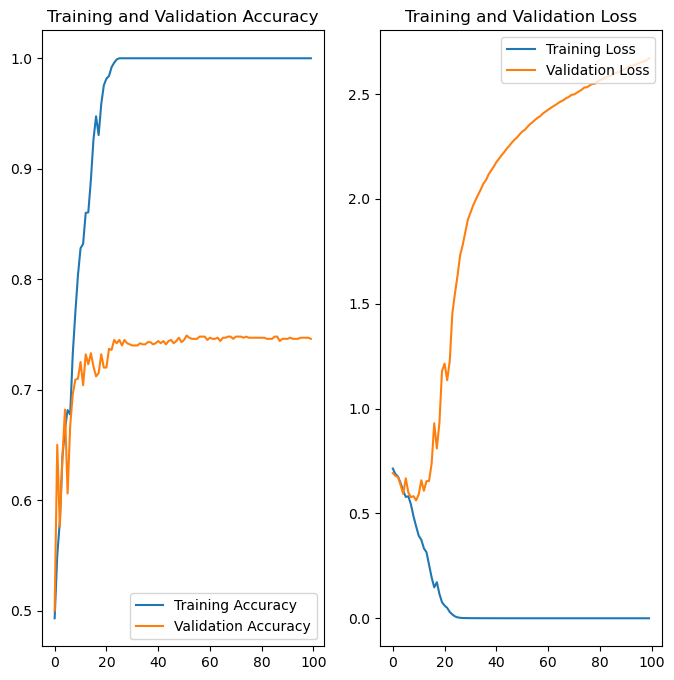

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()
     